# CV Lab 02
## Manahil Fatima Anwar 20K-0134 BAI-7A

### Q1

In [1]:
import os

path = r'C:\Users\ABC\Desktop\BAI\BAI-S7\CV Lab\Lab 02\Pets_Emotions'
count = {}

for name in os.listdir(path):
    path_class = os.path.join(path, name)
    if os.path.isdir(path_class):
        num = len(os.listdir(path_class))
        count[name] = num
        
for name, i in count.items():
    print(f"Class {name}: {i} samples")


Class Angry: 75 samples
Class happy: 90 samples
Class Other: 47 samples
Class Sad: 84 samples


### Q2

In [2]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

images = []
labels = []

resize = (224, 224)

for name in os.listdir(path):
    path_class = os.path.join(path, name)
    if os.path.isdir(path_class):
        for image_name in os.listdir(path_class):
            image_path = os.path.join(path_class, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, resize)
            image = image.astype(np.float32) / 255.0
            images.append(image)
            labels.append(name)

images = np.array(images)
labels = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=31)

print(f"Training set shape (images):{X_train.shape}")
print(f"Training set shape (labels):{y_train.shape}")
print(f"Testing set shape (images):{X_test.shape}")
print(f"Testing set shape (labels):{y_test.shape}")

Training set shape (images):(236, 224, 224, 3)
Training set shape (labels):(236,)
Testing set shape (images):(60, 224, 224, 3)
Testing set shape (labels):(60,)


### Q3

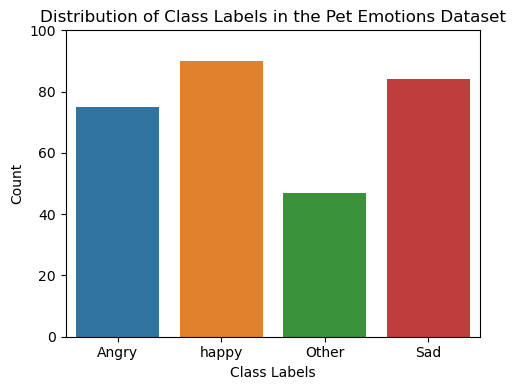

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

count_df = pd.DataFrame.from_dict(count, orient='index', columns=['count'])
plt.figure(figsize=(5, 4))
sns.barplot(x=count_df.index, y=count_df['count'], palette='tab10')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.ylim(0, 100)
plt.title('Distribution of Class Labels in the Pet Emotions Dataset')
plt.tight_layout()
plt.show()

### Q4

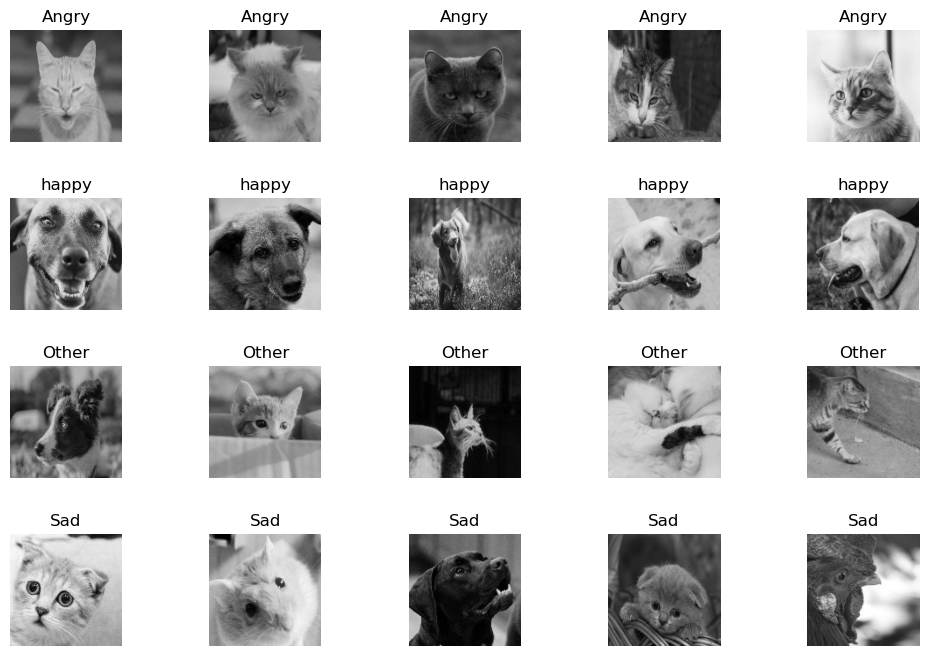

In [4]:
sample_images = []
sample_labels = []

num_samples_per_class = 5
for name in os.listdir(path):
    path_class = os.path.join(path, name)
    if os.path.isdir(path_class):
        sample_count = 0
        for image_filename in os.listdir(path_class):
            if sample_count < num_samples_per_class:
                image_path = os.path.join(path_class, image_filename)
                image = cv2.imread(image_path)
                sample_images.append(image)
                sample_labels.append(name)
                sample_count += 1

num_rows = len(sample_images) // num_samples_per_class
num_cols = num_samples_per_class

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(cv2.cvtColor(sample_images[i], cv2.COLOR_BGR2RGB))
    ax.set_title(sample_labels[i])
    ax.axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

### Q5

In [5]:
class_summary_stats = {}
for name in os.listdir(path):
    path_class = os.path.join(path, name)
    if os.path.isdir(path_class):
        class_stats = []
        for image_filename in os.listdir(path_class):
            class_stats.append(name)
        class_series = pd.Series(class_stats)
        class_summary_stats[name] = {
            'Count': len(class_series),
            'Unique_Emotions': class_series.nunique(),
            'Most_Frequent_Emotion': class_series.mode().iloc[0],
        }
        
class_summary_df = pd.DataFrame.from_dict(class_summary_stats, orient='index')

print("Summary Statistics for Each Class:")
print(class_summary_df)

Summary Statistics for Each Class:
       Count  Unique_Emotions Most_Frequent_Emotion
Angry     75                1                 Angry
happy     90                1                 happy
Other     47                1                 Other
Sad       84                1                   Sad
